# Phase 1 Report: Predicting Life Expectancy from WHO Data


#### Project Group 19
###  Abhishek Mankar (s4010477)
###  Samrudhi Joshi (s3989113)

## Table of Contents
* [Introduction](#introduction) 
  + [Dataset Source](#dataset-source)
  + [Dataset Details](#dataset-details)
  + [Dataset Features](#dataset-features)
  + [Target Feature](#target-feature)
* [Goals and Objectives](#goals-and-objectives)
* [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
* [Data Exploration and Visualisation](#data-exploration-and-visualisation)
  + [One Variable Plot](#one-variable-plot)
  + [Two Variable Plot](#two-variable-plot)
  + [Three Variable Plot](#three-variable-plot)
* [Literature Review](#literature-review)
* [Summary and Conclusion](#summary-and-conclusion)
* [References](#references)


## Introduction <a id='itr'></a>

Life expectancy is one of the important factor for overall health and quality of life in a country. It reflects the average number of years a person is expected to live and is affected by many factors, such as lifestyle choices, access to healthcare, education levels, and income. By understanding what influences life expectancy, governments and health organizations can develop better strategies to improve the well-being of their populations.

In order to determine which factors have the greatest influence on life expectancy, we are using actual data from the World Health Organisation (WHO) in this study. The collection contains data on GDP, education, disease prevalence, and vaccination coverage for nations worldwide. Cleaning the data, examining it with visualisations, and searching for trends that can improve our comprehension of the factors influencing life expectancy are the main goals of this initial stage.

#### Dataset Source

The dataset used in this project is titled **"Life Expectancy (WHO)"** and was obtained from the **Kaggle** platform, where it was curated and shared by contributor Kumar Ajay. This dataset brings together publicly available data from the World Health Organization (WHO) and the World Bank. 

#### Dataset Details

There are **24 columns and 2,938 rows** in the dataset, and each row represents a country for year. The details cover a number of topics related to health, education, income, the prevalence of disease, and access to medical care. These characteristics provide us with a broad perspective on the factors that may influence global life expectancy.

Certain columns contain data such as GDP, BMI, alcohol intake, years of education, vaccination rates, and death rates. These are primarily quantitative figures. There is a column labeled Status, indicating if the country is categorized as Developed or Developing, and another labeled Country, which specifies the country pertaining to each row.

The dataset includes a Year column that indicates the collection time for each entry's data. This allows the dataset to be valuable for tracking how things might have evolved over time.

At this point, the data remains uncleaned and unchanged. Certain columns contain absent values, and there might also be outliers or discrepancies that require attention later in the data preprocessing stage.

In its unprocessed state, the dataset provides a comprehensive foundation of worldwide health and development metrics, and it will be utilized to investigate the different elements associated with life expectancy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from IPython.display import display, HTML

**Loading the dataset**


In [2]:
df = pd.read_csv("C:/Users/91940/Downloads/Life Expectancy Data.csv")


In [3]:
pd.set_option('display.max_columns', None)

**Printing first 10 records from dataset**

In [4]:
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01           

#### Dataset Feature

The dataset includes a variety of features that represent different aspects of a country’s health, economy, education, and demographics. Most of the features are numerical, while a few are categorical. Below is a summary of the key features included in the dataset, along with their data types, units, and a brief description of what each feature represents.We have used the **Python tabulate** library to present this in a readable table format.

In [5]:
# Feature table using tabulate
table = [
    ['Name', 'Data Type', 'Units', 'Description'],
    ['Country', 'Nominal categorical', 'NA', 'Name of the country the record belongs to'],
    ['Status', 'Nominal categorical', 'NA', 'Country development status (Developed or Developing)'],
    ['Year', 'Numeric', 'Year', 'Year of the record'],
    ['Life expectancy', 'Numeric', 'Years', 'Average life expectancy at birth'],
    ['Adult Mortality', 'Numeric', 'Per 1000 people', 'Mortality rate of adults (15–60 years)'],
    ['infant deaths', 'Numeric', 'Count', 'Number of infant deaths per 1000 live births'],
    ['Alcohol', 'Numeric', 'Litres', 'Alcohol consumption per capita (age 15+)'],
    ['percentage expenditure', 'Numeric', 'Percentage', 'Health expenditure as a % of GDP'],
    ['Hepatitis B', 'Numeric', 'Percentage', 'Hepatitis B immunization coverage (%)'],
    ['Measles', 'Numeric', 'Count', 'Number of reported measles cases'],
    ['BMI', 'Numeric', 'kg/m²', 'Average Body Mass Index of the population'],
    ['under-five deaths', 'Numeric', 'Count', 'Deaths under age 5 per 1000 live births'],
    ['Polio', 'Numeric', 'Percentage', 'Polio immunization coverage (%)'],
    ['Total expenditure', 'Numeric', 'Percentage', 'Total health expenditure as % of GDP'],
    ['Diphtheria', 'Numeric', 'Percentage', 'Diphtheria immunization coverage (%)'],
    ['HIV/AIDS', 'Numeric', 'Per 1000 people', 'Deaths per 1000 people due to HIV/AIDS (0–49 years)'],
    ['GDP', 'Numeric', 'USD', 'Gross Domestic Product per capita'],
    ['Population', 'Numeric', 'People', 'Population estimate of the country'],
    ['thinness 1-19 years', 'Numeric', 'Percentage', 'Prevalence of thinness among children and youth (1–19 years)'],
    ['thinness 5-9 years', 'Numeric', 'Percentage', 'Prevalence of thinness among children (5–9 years)'],
    ['Income composition of resources', 'Numeric', 'Index (0–1)', 'Human Development Index component based on income'],
    ['Schooling', 'Numeric', 'Years', 'Average number of years of schooling']
]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════════════╤═════════════════════╤═════════════════╤══════════════════════════════════════════════════════════════╕
│ Name                            │ Data Type           │ Units           │ Description                                                  │
╞═════════════════════════════════╪═════════════════════╪═════════════════╪══════════════════════════════════════════════════════════════╡
│ Country                         │ Nominal categorical │ NA              │ Name of the country the record belongs to                    │
├─────────────────────────────────┼─────────────────────┼─────────────────┼──────────────────────────────────────────────────────────────┤
│ Status                          │ Nominal categorical │ NA              │ Country development status (Developed or Developing)         │
├─────────────────────────────────┼─────────────────────┼─────────────────┼──────────────────────────────────────────────────────────────┤
│ Year                     

#### Target Feature

The target feature for this project is **Life expectancy**, which is a numerical value representing the average number of years a person is expected to live at birth.

In [6]:
print("\nDataset shape (rows, columns):", df.shape)


Dataset shape (rows, columns): (2938, 22)


In [7]:
print("\nColumn data types:")
print(df.dtypes)


Column data types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


## Goals & Objectives

This study is aiming to explore the main factors influencing life expectancy in various nations using publicly available data, including social, economic, and health characteristics. Understanding the factors that affect life expectancy may assist guide healthcare and policy decisions, as it is a significant measure of a community's general well-being.

We are exploring the dataset in detail to get a better idea of how trustworthy it is, what kind of information it holds, and how it's put together. We'll be looking into things like GDP, education levels, death rates, and vaccination stats to figure out which of these might be closely linked to how long people live. To help us spot any patterns, we'll use a mix of simple stats and visuals like graphs and charts basically anything that makes the trends easier to see and understand.

In this investigation, we will also address any absent or inconsistent data, analyze the distribution of each variable, and explore the relationships among various features. These initial steps will provide us with a better understanding of the data prior to engaging in more intricate analysis.

In this project, we will consider each country-year entry as an individual case. While we recognize that real-world trends and regional variations are important, this method allows us to concentrate on comprehending the variables within the dataset without delving into time series analysis

## Data Cleaning & Preprocessing


#### Data Cleaning Steps

* Drop irrelevant features from the dataset  
* Clean or fix column names  
* Check for missing values  
* Handle missing values using median imputation
 rows

**Checking for missing values before cleaning**


In [8]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


**Changing the datatype**

In [9]:
df['Status'] = df['Status'].astype('category')

**Dropping irrelevant column**

In [10]:
df = df.drop(columns=["Country"])

The **Country** column was removed because it serves only as an identifier and does not provide any useful numerical or predictive value. Machine learning models cannot meaningfully interpret country names as features. Including it could introduce noise or unwanted bias in the analysis. Removing it allows the model to focus on actual health, economic, and social indicators that influence life expectancy.

**Changing the datatype**

In [11]:
df.columns = df.columns.str.strip()

In [12]:
print("\nColumn data types:")
print(df.dtypes)


Column data types:
Year                                  int64
Status                             category
Life expectancy                     float64
Adult Mortality                     float64
infant deaths                         int64
Alcohol                             float64
percentage expenditure              float64
Hepatitis B                         float64
Measles                               int64
BMI                                 float64
under-five deaths                     int64
Polio                               float64
Total expenditure                   float64
Diphtheria                          float64
HIV/AIDS                            float64
GDP                                 float64
Population                          float64
thinness  1-19 years                float64
thinness 5-9 years                  float64
Income composition of resources     float64
Schooling                           float64
dtype: object


**Imputing missing values using median**


In [13]:
# Impute missing values using median
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].median(), inplace=True)

When there are outliers or skewed distributions in the data, the **median** is a more robust and trustworthy metric, therefore we utilise it to fill in the missing numbers. The median provides a better central value for characteristics like GDP or population, which might differ significantly between nations, because it is not impacted by extreme values like the mean is. This aids in completing missing data without causing the dataset as a whole to become distorted.

**Displaying cleaned data information**

In [14]:
print("\nCleaned data shape:", df.shape)
print("Missing values remaining:", df.isnull().sum().sum())


Cleaned data shape: (2938, 21)
Missing values remaining: 0


In [15]:
from IPython.display import display, HTML

# Title for the table
display(HTML('<b>Table 2: Summary of numerical features</b>'))

# Nicely rendered summary
display(df.describe(include=['int64', 'float64']).T)


count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2938.0  6.923472e+01  9.509115e+00   
Adult Mortality                  2938.0  1.647257e+02  1.240862e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2938.0  4.546875e+00  3.921946e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2938.0  8.302212e+01  2.299698e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
BMI                              2938.0  3.838118e+01  1.993537e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2938.0  8.261777e+01  2.336717e+01   
Total expenditure                2938.0  5.924098e+00  2.400770e+00   
Diphtheria                       2938.0  8.239312e+01  2.365556e+01   
HIV/AIDS                         2938.0  1.742103e+00  5.077785e+00   
GDP                              2938.0  6.611524e+03  1.329660e+04   
Population                       2938.0  1.023085e+07  5.402242e+07   
thinness  1-19 years             2938.0  4.821886e+00  4.397621e+00   
thinness 5-9 years               2938.0  4.852144e+00  4.485854e+00   
Income composition of resources  2938.0  6.303618e-01  2.051396e-01   
Schooling                        2938.0  1.200984e+01  3.265139e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.200000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       1.092500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      82.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
BMI                                 1.00000      19.400000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.370000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
HIV/AIDS                            0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     580.486996  1.766948e+03   
Population                         34.00000  418917.250000  1.386542e+06   
thinness  1-19 years                0.10000       1.600000  3.300000e+00   
thinness 5-9 years                  0.10000       1.600000  3.300000e+00   
Income composition of resources     0.00000       0.504250  6.770000e-01   
Schooling                           0.00000      10.300000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.560000e+01  8.900000e+01  
Adult Mortality                  2.270000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.390000e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.600000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
BMI                              5.610000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.330000e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
HIV/AIDS                         8.000000e-01  5.060000e+01  
GDP            

## Data Exploration & Visualisation

In this section, we perform **exploratory analysis** to understand the structure and patterns in the dataset. This includes identifying how key features behave and how they relate to life expectancy. The analysis is supported by visual tools such as histograms, boxplots, scatter plots.

#### ONE-VARIABLE PLOTS

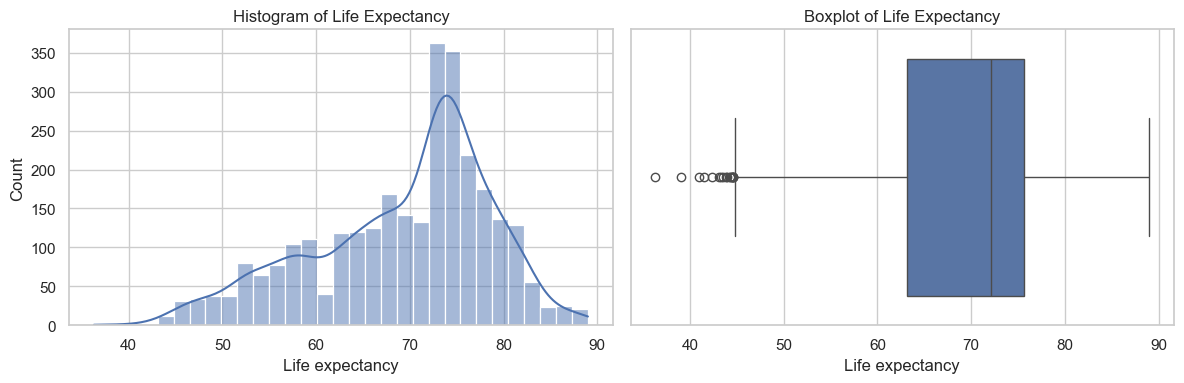

In [16]:
#Plot 1
sns.set(style="whitegrid")

# Life Expectancy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Life expectancy'], kde=True)
plt.title('Histogram of Life Expectancy')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Life expectancy'])
plt.title('Boxplot of Life Expectancy')
plt.tight_layout()
plt.show()

According to the histogram, the majority of nations have life expectancies between 65 and 80 years, with a somewhat left-skewed distribution (more data on the upper end). This implies that many nations have comparatively high life expectancy rates, whereas fewer have low ones. The boxplot, which shows a concentrated interquartile range (IQR) of approximately 65 to 75 years, supports this tendency. Furthermore, several outliers go below 50, indicating that certain countries have significantly lower life expectancies than others.

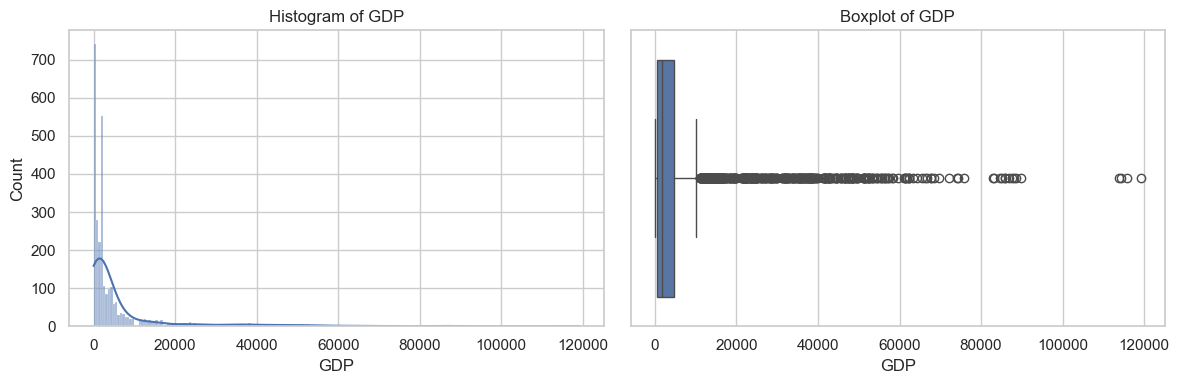

In [17]:
# Plot 2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['GDP'], kde=True)
plt.title('Histogram of GDP')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['GDP'])
plt.title('Boxplot of GDP')
plt.tight_layout()
plt.show()

The histogram shows that most countries have a low GDP, with a very right-skewed distribution, meaning a few countries have extremely high GDP values compared to the rest. The majority of GDP values fall below 20,000, while the rest stretch out toward the higher end. The boxplot supports this by showing a high concentration of values near the lower end and a large number of outliers, representing wealthier countries. This wide spread and presence of outliers suggest significant economic inequality across countries in the dataset.

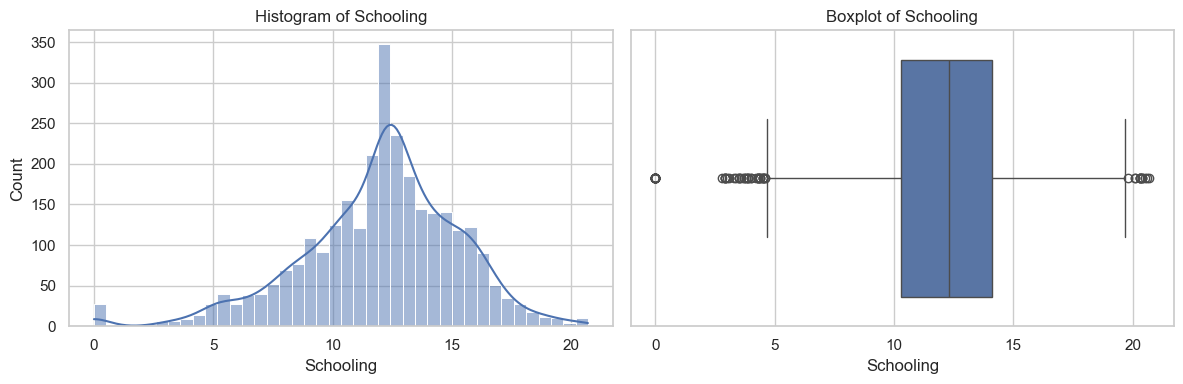

In [18]:
# Plot 3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Schooling'], kde=True)
plt.title('Histogram of Schooling')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Schooling'])
plt.title('Boxplot of Schooling')
plt.tight_layout()
plt.show()


The histogram shows that most countries have an average schooling duration between 9 and 14 years, with a peak around 12 years. The distribution is slightly right-skewed, indicating fewer countries with very high schooling years. The boxplot confirms that the data is fairly concentrated in the middle range but includes a number of outliers on both the lower and upper ends. These outliers represent countries with either very low or very high average years of schooling compared to the global norm.

#### TWO-VARIABLE PLOTS

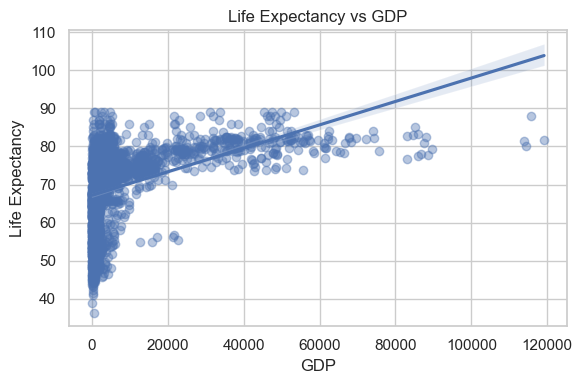

In [19]:
# Plot 1: GDP vs Life Expectancy
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='GDP', y='Life expectancy', scatter_kws={"alpha": 0.4})
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

The scatter plot indicates that life expectancy and a nation's GDP are positively correlated. Although the link is not exactly linear, life expectancy is generally higher in nations with larger GDPs. Although the majority of nations have lower GDPs, life expectancy varies greatly even within these groups. Life expectancy tends to increase with GDP, indicating a positive correlation between economic strength and improved health outcomes. This upward trend is supported by the fitted regression line.

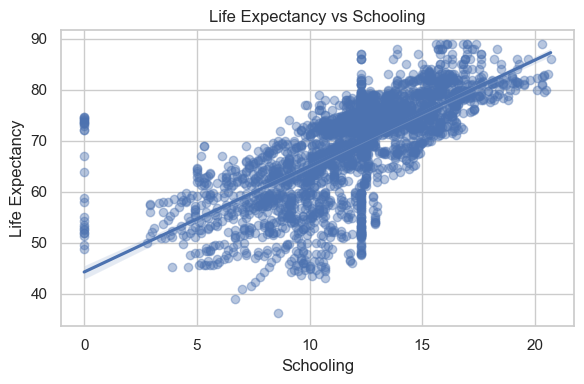

In [20]:
# Plot 2: Schooling vs Life Expectancy
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='Schooling', y='Life expectancy', scatter_kws={"alpha": 0.4})
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

Life expectancy and years of education have a high correlation, according to the scatter plot. Life expectancy tends to increase in accordance with the average number of years spent in school. This suggests that nations with more access to education tend to have people with better health and live longer. The regression line supports the points' obvious rising trend, although their greater concentration in the middle range. Although there are a few variations, the link seems to be rather stable and strong generally.

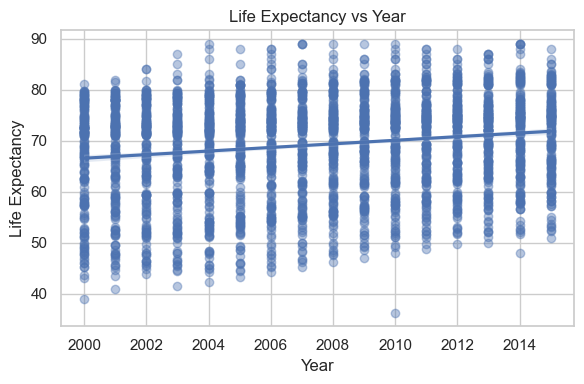

In [21]:
# Plot 3: Year vs Life Expectancy
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='Year', y='Life expectancy', scatter_kws={"alpha": 0.4})
plt.title('Life Expectancy vs Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

The scatter plot shows a slight rise in life expectancy between 2000 and 2015. The regression line shows that life expectancy has gradually increased over time, despite the fact that the data points are dispersed across each year. This points to continued improvements in living standards, healthcare access, and worldwide health conditions. The differences between nations with different health outcomes are also reflected in the large range of values within each year.

#### THREE-VARIABLE PLOTS

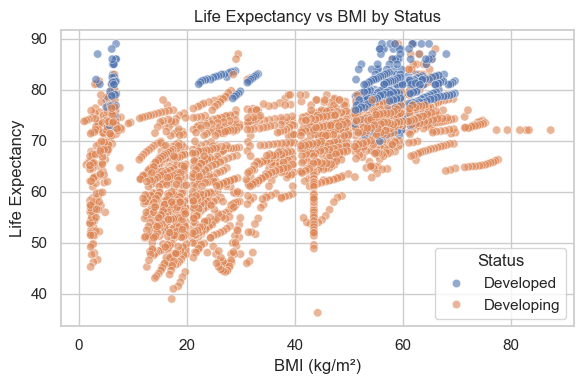

In [22]:
# Plot 1: BMI vs Life Expectancy by Status
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='BMI', y='Life expectancy', hue='Status', alpha=0.6)
plt.title('Life Expectancy vs BMI by Status')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Life Expectancy')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

The scatter plot shows a positive relationship between BMI and life expectancy, particularly for developed countries. Developed nations (in blue) tend to have higher BMIs and higher life expectancy, forming a tight cluster around upper values of both axes. While, developing countries (in orange) show a wider spread and tend to have lower BMI and life expectancy overall. This suggests that a healthier BMI range, along with better living conditions and healthcare, may contribute to longer life in more developed nations.

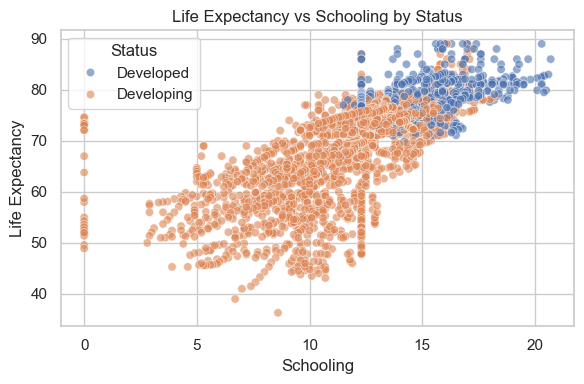

In [23]:
# Plot 2: Schooling vs Life Expectancy by Status
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Schooling', y='Life expectancy', hue='Status', alpha=0.6)
plt.title('Life Expectancy vs Schooling by Status')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Life expectancy and years of education are strongly positively correlated, according to the scatter plot, particularly for industrialised nations. The "Developed" countries, which are grouped in the upper-right section of the graph, often have longer life expectancies and higher levels of education. "Developing" nations, on the other hand, have a greater distribution with often lower life expectancy and levels of education. It also suggests that, particularly for more developed countries, education is crucial to enhancing health outcomes.

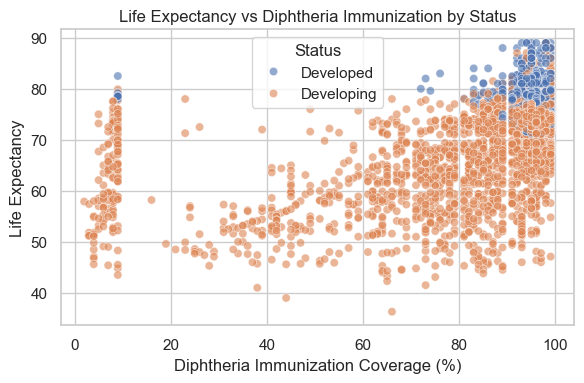

In [24]:
# Plot 3 (Updated): Diphtheria vs Life Expectancy by Status
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Diphtheria', y='Life expectancy', hue='Status', alpha=0.6)
plt.title('Life Expectancy vs Diphtheria Immunization by Status')
plt.xlabel('Diphtheria Immunization Coverage (%)')
plt.ylabel('Life Expectancy')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


Life expectancy and diphtheria vaccination coverage are positively correlated, according to the scatter plot, especially in nations with greater coverage. High vaccination rates and longer life expectancies are indicators of developed nations (in blue), which are usually grouped at the top-right. Although they are more dispersed, developing nations (shown in orange) also exhibit an overall increasing tendency. It also suggests that increased vaccination rates are linked to better health outcomes, particularly in areas with lower incomes. The trend focuses how public health infrastructure contributes to longer life expectancies.

## Literature Review

As machine learning has the ability to influence public health planning, resource allocation, and health policy, it is growing as a significant study field for life expectancy prediction. An effective approach for modelling complex, nonlinear interactions between several socioeconomic and healthcare-related factors that affect longevity is through machine learning (ML) approaches. Recent studies in this field are presented in this overview of the literature, including journal articles and conference presentations that use machine learning (ML) to estimate life expectancy, evaluate the significance of features, and recommend unique predictive models.

Bali and Aggarwal (2022) analyzed global life expectancy trends using machine learning regression models. They found that features such as GDP, alcohol consumption, and immunization coverage are significant predictors. Their work demonstrates that regression techniques can capture meaningful health-related trends from structured datasets. Similarly, Vydehi et al. (2021) used regression models to assess how immunization and Human Development Index (HDI) factors influence life expectancy. Their study reinforced the notion that both healthcare access and social development indicators are essential inputs for predictive modeling.

Faisal et al. (2021) employed structured predictors such as sanitation, literacy, and medical resources in a machine learning framework to build a life expectancy model. Their results showed that combining demographic and economic indicators can significantly increase model accuracy. In a more advanced approach, Depaoli et al. (2023) proposed a functional concurrent regression model with compositional covariates to analyze how causes of death affect longevity over time. Their model captured temporal variation in health determinants, showcasing the need to account for dynamic relationships in life expectancy analysis.

Deep learning techniques have also shown promise in this domain. Marino et al. (2021) enhanced the Lee-Carter mortality forecasting model using deep neural networks to project longevity more accurately. Their method accounted for uncertainty in projections, making it suitable for real-world applications like pension planning and insurance modeling. Another innovative study by Li and Raftery (2019) introduced a Bayesian hierarchical model that incorporated smoking-related mortality into life expectancy predictions. Their model demonstrated improved forecast accuracy by integrating behavior-specific variables.

Further research by Skiadas and Skiadas (2019) bridged classical statistical models and health informatics by estimating healthy life expectancy directly from life tables. Their contribution was particularly valuable in capturing not just quantity of life, but quality. Additionally, a study published in the Journal of Medical Internet Research (2023) developed a prediction model for healthy life years without activity limitations. The authors emphasized the roles of chronic disease prevalence, access to healthcare, and mental well-being in life expectancy outcomes.

Beyond journal articles, several recent conference papers have contributed practical insights. For example, Jalan et al. (2023) presented at the International Conference on Artificial Intelligence and Machine Learning, comparing ensemble regression models for predicting life expectancy. They reported that gradient boosting and random forest techniques outperformed linear models in both accuracy and interpretability. Another conference paper by Dangety et al. (2023) applied ensemble ML models to study socioeconomic influences on longevity, highlighting variables such as sanitation and urbanization.

Khader Basha et al. (2024) also contributed a conference study that tested multiple supervised learning models, including decision trees and support vector machines, to estimate life expectancy. Their results suggested that ensemble-based models are better suited for datasets with mixed variable types and nonlinear interactions. In a complementary study, Vijaya (2024) examined how feature engineering and model tuning can enhance life expectancy predictions in developing countries.

Together, these studies show that machine learning is useful for both determining the most significant variables and forecasting life expectancy. Factors such as GDP, schooling, HIV/AIDS prevalence, and immunisation accessibility are frequently identified as significant factors. Also, the use of dynamic modelling, Bayesian inference, and deep learning approaches suggests a developing discipline that is bridging the gap between application in the real world and statistical accuracy.

As the global health landscape continues to shift due to factors such as pandemics, aging populations, and climate change, robust predictive tools will be critical for governments and health organizations. The literature indicates that machine learning-based life expectancy models have a strong foundation and immense potential for policy-making and global health monitoring.lysis of Immunization and HDI Factors using Machine Learning Regression Algorithms. 

## Summary & Conclusions

One significant issue that has the real-world consequences is finding out and forecasting life expectancy in different nations. Accurate estimates can help researchers, politicians, and global health organisations pinpoint regions that need attention, better allocate resources, and monitor the effectiveness of development and health initiatives. The objective of this project is to use publicly available health, economic, and demographic variables to provide a data-driven knowledge of the determinants influencing life expectancy.

We worked on data cleaning, preprocessing, and exploratory data analysis throughout the project's initial phase. We analysed the dataset's structure after loading it and found that a number of columns had missing values, especially in features like GDP, BMI, alcohol, and HIV/AIDS. Because median imputation is more robust when outliers are present, we used it to fill in these gaps. additionally, we kept the Year column for temporal analysis but removed the Country column since it was simply used as an identifier. To guarantee correct handling during visual analysis, the Status column was changed to a categorical type.

Using visualizations such as histograms and boxplots, we examined the distribution of life expectancy and its variation across different countries. We found that life expectancy tends to follow a roughly normal distribution, although it is slightly skewed to the left due to lower values in some developing countries. Developed countries consistently showed higher life expectancy, with less variation, while developing countries had wider and generally lower life expectancy ranges.

We also looked into the link between life expectancy and other factors using regression plots and scatterplots. Characteristics such as GDP, education, and diphtheria vaccination coverage were found to be positively connected with life expectancy, indicating that countries with stronger economies, better educational systems, and higher vaccination rates often had healthier populations. Shorter life extends however, were associated with increased HIV/AIDS prevalence, confirming strong public health concerns in certain regions.

Our three-variable plots provided further insight into the difference between developed and developing countries. In nearly every case, developed countries clustered around higher values for both life expectancy and key health indicators, while developing countries were more scattered and included more extreme cases. This visualization helped to reinforce the idea that health outcomes are closely tied to national development status.

Overall, this phase gave us a deep understanding of the dataset and the relationships within it. The data is now clean, well-prepared, and ready for modeling in the next phase. We have identified a strong set of influential features that appear to be key predictors of life expectancy. These insights will serve as a solid foundation for building and testing predictive models in Phase 2.

## References

Rajarshi, K. (2017). Life Expectancy (WHO). Www.kaggle.com. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

‌

**Journal Articles**

Bali, V., Aggarwal, D., Singh, S., & Shukla, A. (2021). Life Expectancy: Prediction & Analysis using ML. 2021 9th International Conference on Reliability, Infocom Technologies and Optimization (Trends and Future Directions) (ICRITO). https://doi.org/10.1109/icrito51393.2021.9596123

‌Depaoli, E. G., Stefanucci, M., & Mazzuco, S. (2023). Functional concurrent regression with compositional covariates and its application to the time-varying effect of causes of death on human longevity. ArXiv.org. https://arxiv.org/abs/2301.06333

Faisal, K., Alomari, D., Alasmari, H., Alghamdi, H., & Saeedi, K. (2021). Life Expectancy Estimation based on Machine Learning and Structured Predictors. 2021 3rd International Conference on Advanced Information Science and System (AISS 2021). https://doi.org/10.1145/3503047.3503122
‌

Li, Y., & Raftery, A. E. (2021). Accounting for smoking in forecasting mortality and life expectancy. The Annals of Applied Statistics, 15(1). https://doi.org/10.1214/20-aoas1381

Marino, M., Levantesi, S., & Nigri, A. (2021). Deepening Lee-Carter for longevity projections with uncertainty estimation. ArXiv.org. https://arxiv.org/abs/2103.10535

Skiadas, C. H., & Skiadas, C. (2019). Direct healthy life expectancy estimates from life tables with a Sullivan extension. Journal of Population Research, 36(2), 123–140. Retrieved from https://arxiv.org/pdf/1909.10903

Nishi, M., Nagamitsu, R., & Matoba, S. (2023). Development of a Prediction Model for Healthy Life Years Without Activity Limitation: National Cross-sectional Study. JMIR Public Health and Surveillance, 9, e46634. https://doi.org/10.2196/466

Basha, S. K. (2022). MACHINE LEARNING METHOD FOR LIFE EXPECTANCY PREDICTION. Journal of Modern Physics, XI(VI), 140–145. https://www.researchgate.net/publication/378874579_MACHINE_LEARNING_METHOD_FOR_LIFE_EXPECTANCY_PREDICTION

Vijaya, K. (2024). Predictive Analytics for Future Life Expectancy Using Machine Learning. Indian Scientific Journal of Research in Engineering and Management, 08(03), 1–5. https://doi.org/10.55041/ijsrem29889

Shah, N. H., Milstein, A., & Bagley, PhD, S. C. (2019). Making Machine Learning Models Clinically Useful. JAMA, 322(14), 1351. https://doi.org/10.1001/jama.2019.10306

‌

**Conference Papers**

Vydehi, K., Manchikanti, K., & Kumar, T. V. (2021). Life expectancy prediction through analysis of immunization and HDI factors using machine learning regression algorithms. In Proceedings of the 4th International Conference on Inventive Computation Technologies (pp. 1–6). https://doi.org/10.1109/ICICT51059.2021.9358519

Faisal, K., Alomari, D., Alasmari, H., Alghamdi, H., & Saeedi, K. (2021). Life expectancy estimation based on machine learning and structured predictors. In Proceedings of the 3rd International Conference on Advanced Information Science and System (pp. 1–8). https://doi.org/10.1145/3485128.3485165

Deepanshi Jalan, Tuli, A., Chaudhary, V., Sharma, N., & Manik Rakhra. (2023). Machine Learning Models for Life Expectancy. https://doi.org/10.1109/icaia57370.2023.10169737

‌Sowjanya Dangety, Kasani Vaddi Kasulu, G. Swetha, Begum, Z., & A. Lakshmanarao. (2024). Exploring Socioeconomic Influences on Life Expectancy through Machine Learning Ensemble Regression Techniques. 2024 4th International Conference on Intelligent Technologies (CONIT), 1–5. https://doi.org/10.1109/CONIT61985.2024.10626849
‌
‌83